In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
df1 = pd.read_csv('./data/sample_data.csv', usecols=[0,1])
print(df1)

     x    y
0  152  191
1  175  235
2  179  214
3  222  274
4  202  288
5  221  269
6  239  315
7  164  201


In [4]:
y = df1['y']
x1 = df1[['x']]
x = sm.add_constant(x1)

fit_test1 = sm.OLS(y, x).fit()
print(fit_test1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     44.54
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           0.000548
Time:                        11:52:57   Log-Likelihood:                -32.693
No. Observations:                   8   AIC:                             69.39
Df Residuals:                       6   BIC:                             69.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1820     39.481     -0.309      0.7

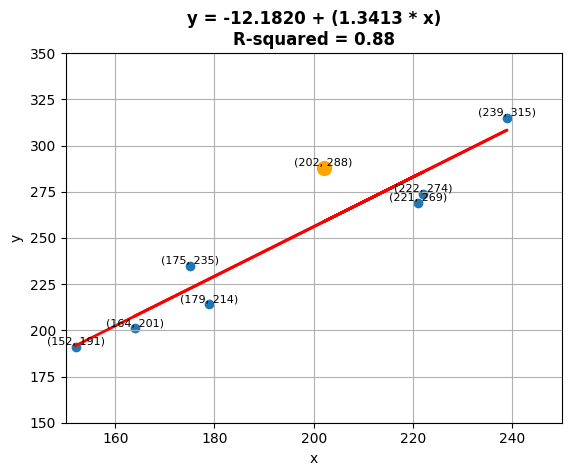

In [5]:
fig, ax = plt.subplots()
ax.scatter(df1['x'], df1['y'])
ax.set_xlim(150, 250)
ax.set_ylim(150, 350)
for i, (x_val, y_val) in enumerate(zip(df1['x'], df1['y'])):
    plt.text(x_val, y_val, f'({x_val}, {y_val})', 
             fontsize=8, ha='center', va='bottom')
y = -12.1820 + (1.3413 * x)
ax.plot(x, y, linewidth=2, color='red')
ax.set_title('y = -12.1820 + (1.3413 * x)\nR-squared = 0.88',
             fontweight = 'bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
highlight_index = 4
highlight_color = 'orange'
highlight_size = 100
ax.scatter(df1['x'][highlight_index], df1['y'][highlight_index],
           color = highlight_color, s = highlight_size)
plt.grid()
plt.show()

In [7]:
df2 = pd.read_csv('./data/sample_data.csv', usecols=[2, 3])
print(df2)

    x1   y1
0  152  130
1  175  115
2  179  120
3  222  110
4  202  115
5  221  105
6  239   90
7  164  130


                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     37.97
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           0.000838
Time:                        12:03:56   Log-Likelihood:                -23.499
No. Observations:                   8   AIC:                             51.00
Df Residuals:                       6   BIC:                             51.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.6050     12.510     15.236      0.0

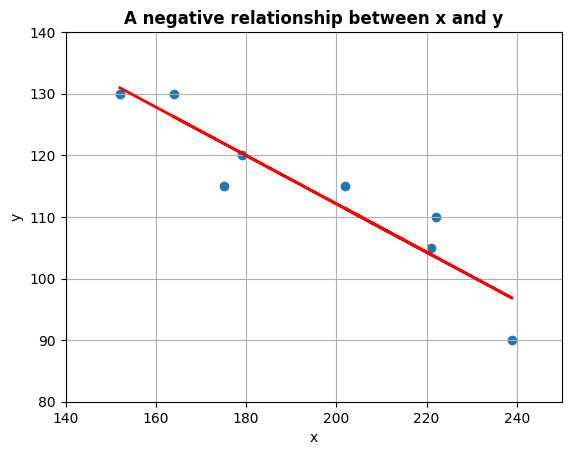

In [8]:
y = df2['y1']
x1 = df2[['x1']]
x = sm.add_constant(x1)

fit_test2 = sm.OLS(y, x).fit()
print(fit_test2.summary())

fig, ax = plt.subplots()
ax.scatter(df2['x1'], df2['y1'])
ax.set_xlim(140, 250)
ax.set_ylim(80, 140)
y = 190.6050 - (0.3924 * x)
ax.plot(x, y, linewidth = 2, color = 'red')
ax.set_title('A negative relationship between x and y',
             fontweight = 'bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
plt.show()

In [9]:
df3 = pd.read_csv('./data/sample_data.csv', usecols=[4, 5])
print(df3)

    x2   y2
0  152  195
1  175  160
2  179  190
3  222  265
4  202  240
5  221   90
6  239  105
7  164   85


                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.166
Method:                 Least Squares   F-statistic:                  0.005843
Date:                Mon, 10 Nov 2025   Prob (F-statistic):              0.942
Time:                        12:09:56   Log-Likelihood:                -44.621
No. Observations:                   8   AIC:                             93.24
Df Residuals:                       6   BIC:                             93.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.5043    175.351      1.024      0.3

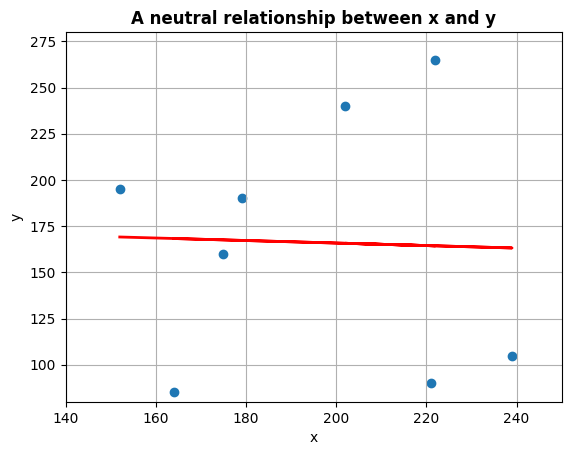

In [10]:
y = df3['y2']
x1 = df3[['x2']]
x = sm.add_constant(x1)

fit_test3 = sm.OLS(y, x).fit()
print(fit_test3.summary())

fig, ax = plt.subplots()
ax.scatter(df3['x2'], df3['y2'])
ax.set_xlim(140, 250)
ax.set_ylim(80, 280)
y = 179.5043 - (0.0682 * x)
ax.plot(x, y, linewidth = 2, color = 'red')
ax.set_title('A neutral relationship between x and y',
             fontweight = 'bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
plt.show()

In [11]:
df4 = df1.loc[df1.index != 4].copy()
print(df4)

     x    y
0  152  191
1  175  235
2  179  214
3  222  274
5  221  269
6  239  315
7  164  201


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     85.42
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           0.000249
Time:                        13:47:44   Log-Likelihood:                -25.919
No. Observations:                   7   AIC:                             55.84
Df Residuals:                       5   BIC:                             55.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9857     27.584     -0.326      0.7

c:\Users\PauloOliveira\py_studies\sepn\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


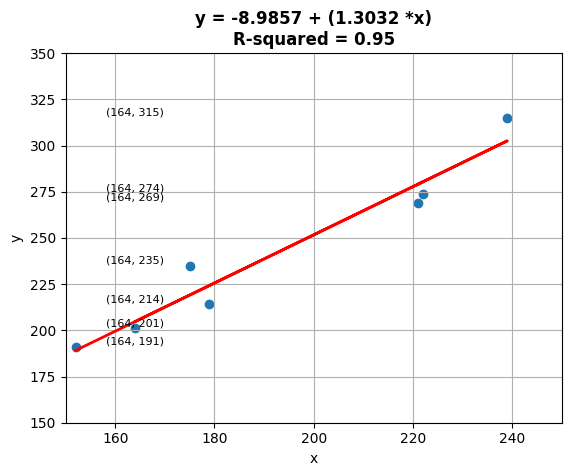

In [12]:
y = df4['y']
x1 = df4[['x']]
x = sm.add_constant(x1)

fit_test4 = sm.OLS(y, x).fit()
print(fit_test4.summary())

fig, ax = plt.subplots()
ax.scatter(df4['x'], df4['y'])
ax.set_xlim(150, 250)
ax.set_ylim(150, 350)
for i, (x_vali, y_val) in enumerate(zip(df4['x'], df4['y'])):
    plt.text(x_val, y_val, f'({x_val}, {y_val})',
             fontsize = 8, ha = 'center', va = 'bottom')
y = -8.9857 + (1.3032 * x)
ax.plot(x, y, linewidth=2, color='red')
ax.set_title('y = -8.9857 + (1.3032 *x)\nR-squared = 0.95',
             fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
plt.show()

In [13]:
mds = pd.read_csv("./data/mds.csv")
print(mds.info())
print(mds)
print(mds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stage1  20 non-null     int64
 1   stage2  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes
None
    stage1  stage2
0      152     191
1      162     184
2      165     193
3      163     191
4      166     193
5      187     292
6      175     235
7      202     226
8      179     214
9      222     274
10     184     300
11     193     242
12     255     279
13     202     288
14     221     269
15     207     329
16     227     268
17     239     315
18     164     201
19     226     345
           stage1      stage2
count   20.000000   20.000000
mean   194.550000  251.450000
std     29.623026   51.112338
min    152.000000  184.000000
25%    165.750000  199.000000
50%    190.000000  255.000000
75%    221.250000  289.000000
max    255.000000  345.000000


In [15]:
print(stats.shapiro(mds.stage1))
print(stats.shapiro(mds.stage2))

ShapiroResult(statistic=np.float64(0.9446673217389622), pvalue=np.float64(0.29328758849732417))
ShapiroResult(statistic=np.float64(0.9290259439587454), pvalue=np.float64(0.1478907551379664))


In [16]:
upper_threshold = 194.55 + (3 * 29.62)
lower_threshold = 194.55 - (3 * 29.62)

exceed_threshold = mds[(mds['stage1'] > upper_threshold) | \
                      (mds['stage1'] < lower_threshold)]
print(exceed_threshold)

Empty DataFrame
Columns: [stage1, stage2]
Index: []


In [17]:
upper_threshold = 251.45 + (3 * 51.11)
lower_threshold = 251.45 - (3 * 51.11)
exceed_threshold = mds[(mds['stage2'] > upper_threshold) | \
                       (mds['stage2'] < lower_threshold)]
print(exceed_threshold)

Empty DataFrame
Columns: [stage1, stage2]
Index: []


In [18]:
y = mds['stage2']
x = mds['stage1']
x = sm.add_constant(x)

In [19]:
lm = sm.OLS(y, x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 stage2   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     24.35
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           0.000107
Time:                        15:59:16   Log-Likelihood:                -97.991
No. Observations:                  20   AIC:                             200.0
Df Residuals:                      18   BIC:                             202.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0778     52.150     -0.059      0.9

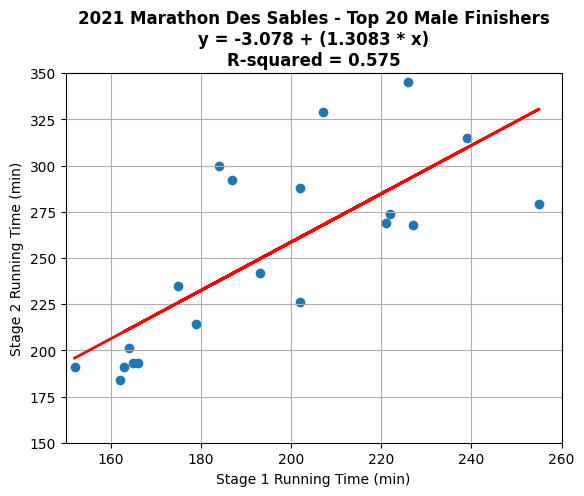

In [20]:
plt.scatter(mds['stage1'], mds['stage2'])
plt.xlim(150, 260)
plt.ylim(150, 350)
yhat = -3.078 + (1.3083 * x)
plt.plot(x, yhat, linewidth = 2, color = 'red')
plt.title('2021 Marathon Des Sables - Top 20 Male Finishers\n'
          'y = -3.078 + (1.3083 * x)\n'
          'R-squared = 0.575', fontweight = 'bold')
plt.xlabel('Stage 1 Running Time (min)')
plt.ylabel('Stage 2 Running Time (min)')
plt.grid()
plt.show()

In [21]:
SST = np.sum((mds['stage2'] - np.mean(mds['stage2'])) ** 2)
print(SST)

49636.950000000004


In [23]:
SSR = np.sum((lm.predict(x) - np.mean(mds['stage2'])) ** 2)
print(SSR)

28537.790271217767


In [24]:
print(lm.fittedvalues)

0     195.782270
1     208.865168
2     212.790037
3     210.173458
4     214.098327
5     241.572412
6     225.872935
7     261.196759
8     231.106094
9     287.362554
10    237.647543
11    249.422151
12    330.536117
13    261.196759
14    286.054265
15    267.738208
16    293.904003
17    309.603480
18    211.481747
19    292.595713
dtype: float64


In [25]:
R2 = SSR / SST
print(R2)

0.5749303748763324


In [26]:
SSE = SST - SSR
print(SSE)

21099.159728782237


In [27]:
SST_new = SSR + SSE
print(SST_new)


49636.950000000004


In [28]:
SSE = np.sum(lm.resid ** 2)
print(SSE)

21099.15972878225


In [29]:
R2 = (1 - (SSE / SST))
print(R2)

0.574930374876332


In [31]:
F = (SSR / 1) / (SSE / (20 - 1 - 1))
print(F)

24.346003892334487


In [32]:
stage1_sum = mds['stage1'].sum()
print(stage1_sum)

stage2_sum = mds['stage2'].sum()
print(stage2_sum)

3891
5029


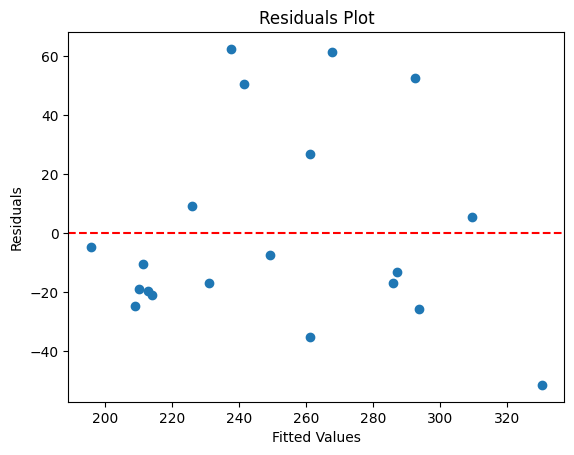

In [33]:
plt.scatter(lm.fittedvalues, lm.resid)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [34]:
print(durbin_watson(lm.resid))

2.326460183111217


In [35]:
lm_BreuschPagan = het_breuschpagan(lm.resid, lm.model.exog)
print(lm_BreuschPagan[1])

0.18107131632120604


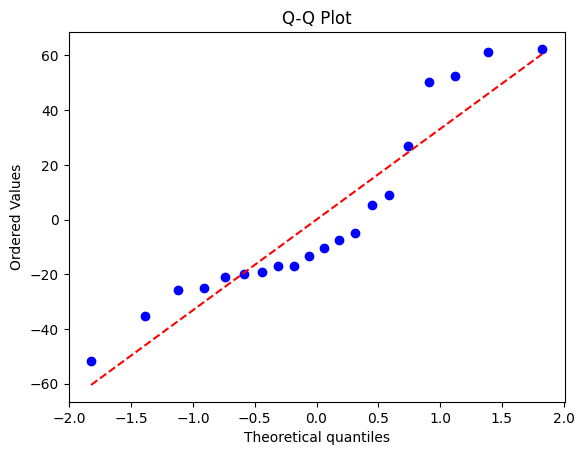

In [36]:
stats.probplot(lm.resid, dist = 'norm', plot = plt)
plt.gca().get_lines()[1].set_linestyle('--')
plt.title('Q-Q Plot')
plt.show()


In [37]:
print(stats.jarque_bera(lm.resid))

SignificanceResult(statistic=np.float64(2.1500379832809946), pvalue=np.float64(0.3412912735582721))
